# **Desafio de Clusterização - Gabriel Dantas de Moraes Almeida**

Repositório Git desse desafio: [link](https://github.com/gdantas04/Desafios-Trainee-IEEE-CIS/tree/main/semana02).

### Bibliotecas utilizadas

In [73]:
import os
import kagglehub

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.preprocessing import StandardScaler



---



## **Tarefa 01:** Apenas com a observação dos dados por meio de tabelas e dataframe, apresente suas hipóteses

 ### Importação do banco de dados

In [74]:
databaseFolder = kagglehub.dataset_download("jayaantanaath/student-habits-vs-academic-performance")
csvPath = os.path.join(databaseFolder, 'student_habits_performance.csv')

In [75]:
df = pd.read_csv(csvPath)
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


Com base nos dados apresentados, acredita-se que os estudantes que sabem balancear tempo de estudo com saúde e tempo gasto na internet terão mais chances de obterem um resultado bom nas provas.

Além disso, acredita-se que podem haver correlações positivas muito fortes entre:


*   **Saúde e nota obtida:** alunos que são saudáveis podem apresentar uma melhor performance em comparação com alunos não saudáveis. Isso se deve ao fato de que as condições físicas e mentais afetam diretamente o desempenho acadêmico;
*   **Saúde e tempo de estudo por dia:** alunos que são saudáveis estarão mais aptos ficamente e mentalmente para estudar mais horas por dia;
*   **Tempo de estudo por dia e nota obtida:** quanto mais tempo se prepara para um exame, maior a chance de obter uma nota alta.



Acredita-se, ainda, que possam existir os seguintes clusters:


*   Alunos de alta, média e baixa performance;
*   Alunos que conseguem e não conseguem consciliar saúde e estudo.





## **Tarefa 02:** Realize uma EDA da forma que julgar mais adequada

### Passo 01: Compreensão dos tipos de dados

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

Temos variáveis categóricas e numéricas contínuas e discretas. Vamos tratar essas variáveis posteriormente.

### Passo 02: Identificação de dados faltantes e outliers

Dentre todas as variáveis, as únicas que podem ter valores "0" como uma representação de valor faltante são as variáveis "age" e "sleep_hours".

Com base nisso, podemos verificar se existem 0's nessas colunas:

In [77]:
zeros_age = (df['age'] == 0).sum()
zeros_sh = (df['sleep_hours'] == 0).sum()

print(zeros_age)
print(zeros_sh)

0
0


Evidentemente não existem 0's nessas colunas.

Podemos fazer uma análise para identificar valores NaN ou blocos vazios do dataset:

In [78]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


Existem 91 valores faltantes na coluna `parental_education_level`. Provavelmente essa variável é MNAR: pais preferem não informar o nível de formação acadêmica (muitas vezes pode ser constrangedor), muitos alunos podem não ter contato com os pais ou não ter pais, por exemplo.

Podemos, adicionalmente, identificar o quão íntegro está o dataset:

In [79]:
total = len(df)
full_lines = df.dropna().shape[0]
percentage = (full_lines / total) * 100

print(f"{percentage:.2f}% das linhas estão sem valores faltantes.")

90.90% das linhas estão sem valores faltantes.


Como o dataset é pequeno e possui 10% das linhas incompletas, acredita-se que o melhor a se fazer seja fazer uma imputação pela moda. Escolheu-se fazer pela moda pelo fato de `parental_education_level` ser uma variável categórica.

In [80]:
mode = df['parental_education_level'].mode()
df['parental_education_level'] = df['parental_education_level'].fillna(mode[0])

In [81]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


Como visto, todos os dados faltantes foram tratados.

Vamos estudar se existem outliers no dataset. Para isso, implementa-se a função abaixo que checa se existem outliers em cada coluna numérica. Caso existam outliers, faz-se a remoção das linhas afetadas.

In [82]:
def remove_outliers(df):
    df_clean = df.copy()

    for column in df_clean.columns:
        if df_clean[column].dtype in ['float64', 'int64']:
            mean = df_clean[column].mean()
            std = df_clean[column].std()
            is_outlier = abs(df_clean[column] - mean) > 3 * std

            num_outliers = is_outlier.sum()
            print(f"Outliers encontrados na coluna '{column}': {num_outliers}")

            # Remove as linhas que são outliers nessa coluna
            df_clean = df_clean[~is_outlier]

    print(f"\nTamanho original: {len(df)}")
    print(f"Tamanho após remoção de outliers: {len(df_clean)}")
    return df_clean

df = remove_outliers(df)

Outliers encontrados na coluna 'age': 0
Outliers encontrados na coluna 'study_hours_per_day': 2
Outliers encontrados na coluna 'social_media_hours': 3
Outliers encontrados na coluna 'netflix_hours': 2
Outliers encontrados na coluna 'attendance_percentage': 0
Outliers encontrados na coluna 'sleep_hours': 0
Outliers encontrados na coluna 'exercise_frequency': 0
Outliers encontrados na coluna 'mental_health_rating': 0
Outliers encontrados na coluna 'exam_score': 1

Tamanho original: 1000
Tamanho após remoção de outliers: 992


Neste caso, por existirem poucos outliers, acredita-se que a remoção dos dados seja uma maneira razoável de tratá-los.

### Passo 03: Detecção de padrões

Antes de iniciar a interpretação das variáveis, acredita-se que seja útil separar a nota em menções, de modo a simplificar a análise e agrupar certos conjuntos de notas.

In [83]:
df['mention'] = df['exam_score'].apply(lambda x: (
    'SS' if x >= 90 else
    ('MS' if x >= 70 else
    ('MM' if x >= 50 else
    ('MI' if x >= 30 else
     'II')))
))

Podemos analisar como cada variável se correlaciona com o `exam_score` através do plot abaixo:

In [84]:
def Correlations(dataframe, variableToCompare):
    correlations = []

    # Calcula a correlação entre cada coluna e a variável de interesse
    for column in dataframe.columns:
        if column != variableToCompare and dataframe[column].dtype in ['int64', 'float64']:
            correlation = dataframe[[column, variableToCompare]].corr().loc[variableToCompare, column]
            correlations.append((column, correlation))

    # Ordena os resultados da maior para a menor correlação
    correlations.sort(key=lambda x: abs(x[1]), reverse=True)

    for col, corr in correlations:
        print(f'{col}: {corr:.3f}')

Correlations(df, 'exam_score')

study_hours_per_day: 0.824
mental_health_rating: 0.319
netflix_hours: -0.167
social_media_hours: -0.164
exercise_frequency: 0.153
sleep_hours: 0.124
attendance_percentage: 0.089
age: -0.011


A partir disso, pode-se fazer um box plot das variáveis com correlação mais acentudada:

In [85]:
def box_plot(dataf, X, Y, Order=None):
  sns.boxplot(x=X, y=Y, data=dataf, color='lightcoral', order=Order)
  plt.title(f'{X} X {Y}')
  plt.xlabel(f'{X}')
  plt.ylabel(f'{Y}')
  plt.show()

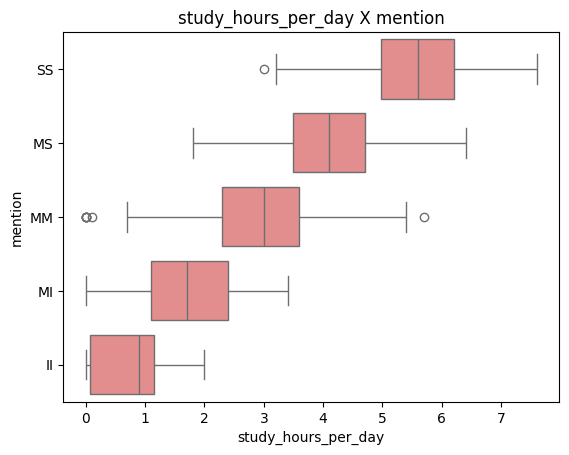

In [86]:
box_plot(df, 'study_hours_per_day', 'mention', ['SS', 'MS', 'MM', 'MI', 'II'])

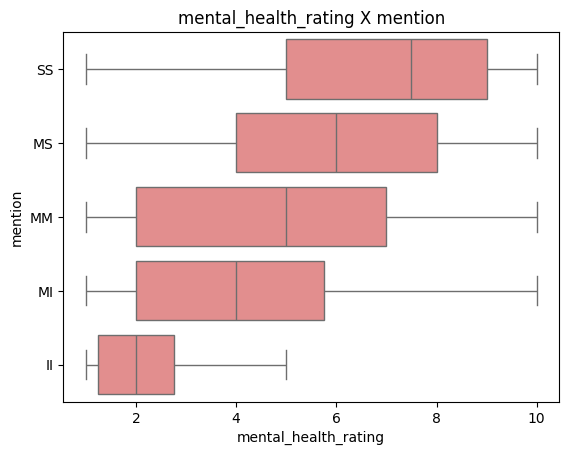

In [87]:
box_plot(df, 'mental_health_rating', 'mention', ['SS', 'MS', 'MM', 'MI', 'II'])

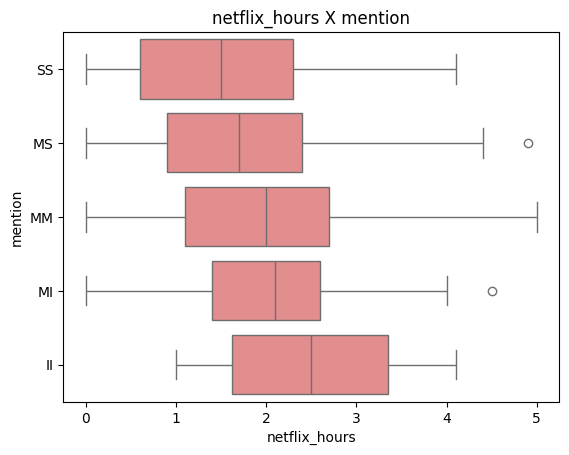

In [88]:
box_plot(df, 'netflix_hours', 'mention', ['SS', 'MS', 'MM', 'MI', 'II'])

Adicionalmente podemos fazer histogramas das principais variáveis:

In [89]:
def plot_histogram(dataFrame, column):

  # Criação da figura com dois subplots
  fig, (ax_box, ax_hist) = plt.subplots(
      nrows=2,
      sharex=True,
      gridspec_kw={"height_ratios": (0.1, 0.75)},
      figsize=(6, 5)
  )

  # Configuração do Boxplot
  sns.boxplot(data=dataFrame, x=column, ax=ax_box, color='lightcoral')
  ax_box.set(title=f'Boxplot e Histograma - {column}')
  ax_box.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
  ax_box.set_yticks([])  # remove ticks do eixo Y do boxplot

  # Configuração do Histograma
  ax_hist.hist(dataFrame[column], bins=range(int(dataFrame[column].min()),
                                             int(dataFrame[column].max())+2),
                                             color='skyblue',
                                             edgecolor='black')
  ax_hist.set_xlabel(f'{column}')
  ax_hist.set_ylabel('Occurrencies')
  ax_hist.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
  ax_hist.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

  plt.tight_layout()

  # Obtenção de resultados estatísticos da coluna em análise
  print(dataFrame[column].describe())

  plt.show()

count    992.000000
mean      69.630343
std       16.773566
min       23.100000
25%       58.500000
50%       70.500000
75%       81.300000
max      100.000000
Name: exam_score, dtype: float64


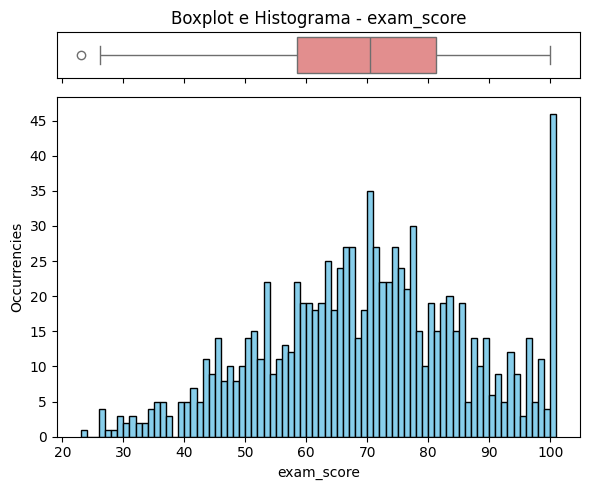

In [90]:
plot_histogram(df, 'exam_score')

count    992.000000
mean       3.545262
std        1.455182
min        0.000000
25%        2.600000
50%        3.500000
75%        4.500000
max        7.600000
Name: study_hours_per_day, dtype: float64


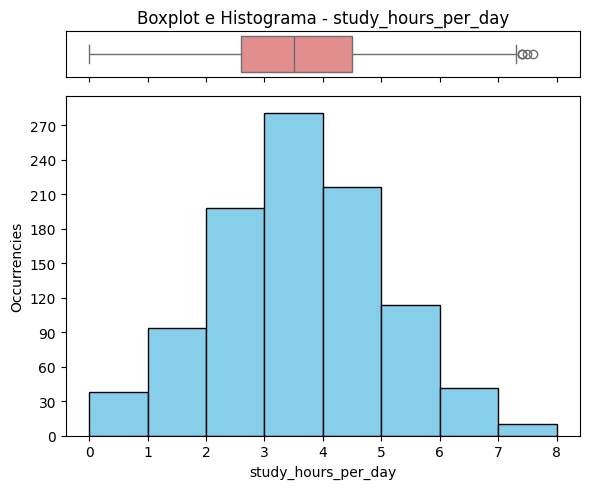

In [91]:
plot_histogram(df, 'study_hours_per_day')

count    992.000000
mean       5.436492
std        2.851522
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: mental_health_rating, dtype: float64


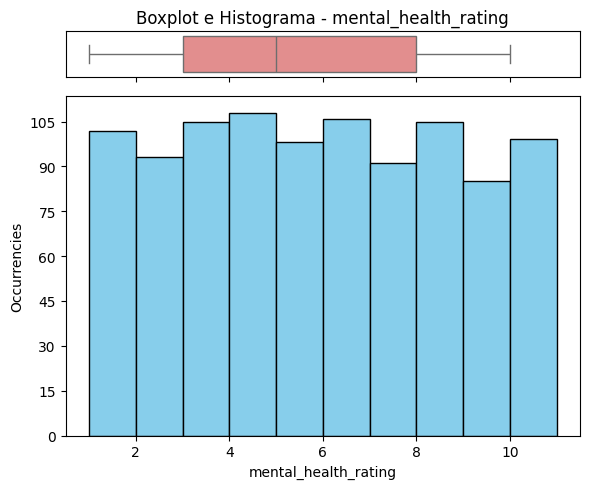

In [92]:
plot_histogram(df, 'mental_health_rating')

count    992.000000
mean       1.810484
std        1.063916
min        0.000000
25%        1.000000
50%        1.800000
75%        2.500000
max        5.000000
Name: netflix_hours, dtype: float64


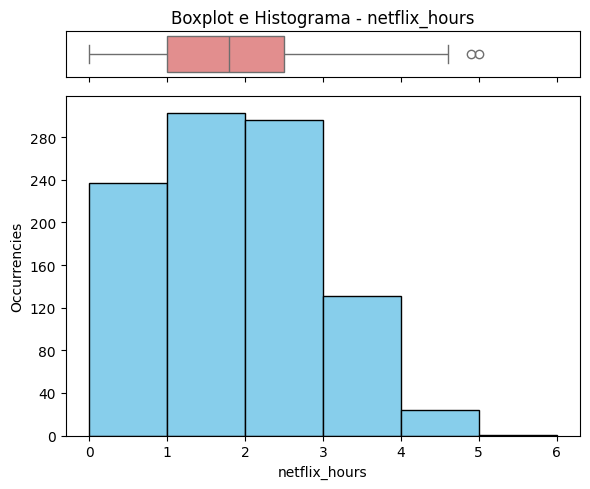

In [93]:
plot_histogram(df, 'netflix_hours')

Nota-se, portanto, que existem correlações positivas bem acentudas entre as variáveis que representam a saúde ou tempo de estudo com relação ao resultado do exame.

Nota-se, ainda, que muitas dessas variáveis seguem uma distribuição normal, evidenciando a presença de um comportamento mais comum e usual.

Para complementar a análise, pode-se fazer um scatter plot entre todas as variáveis para identificar possíveis clusters:

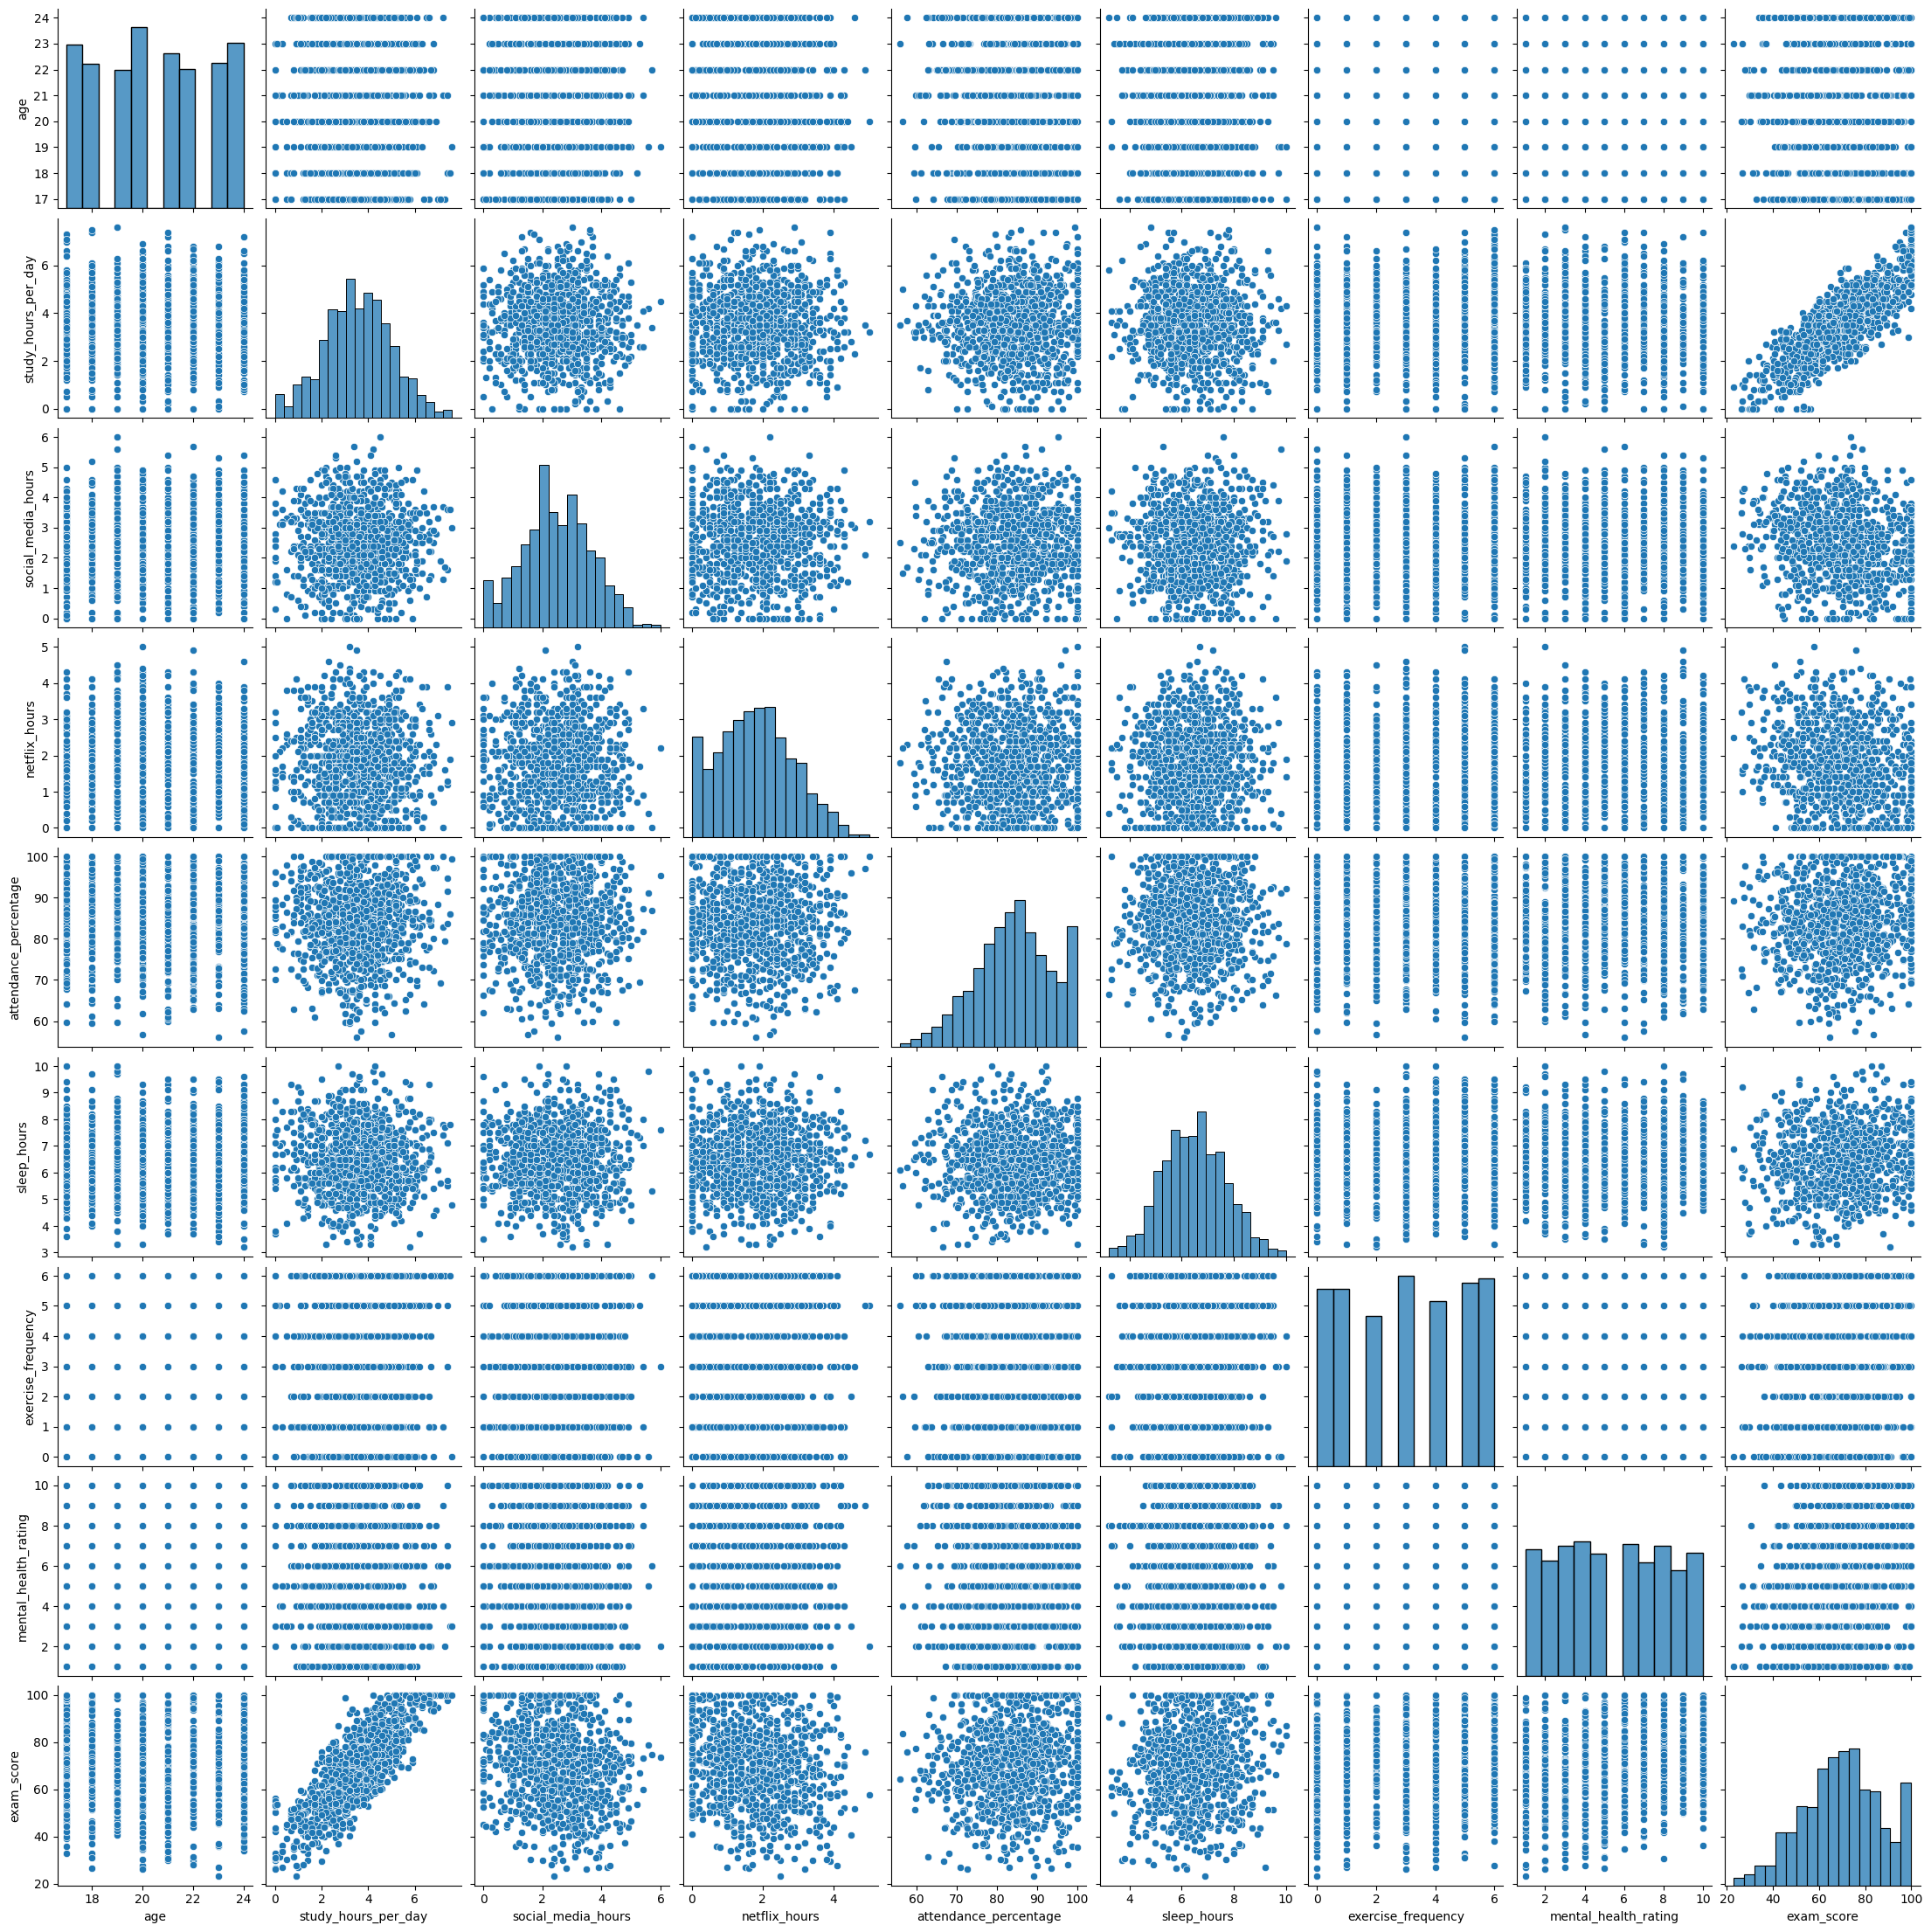

In [94]:
sns.pairplot(df)
plt.show()

Evidentemente não existem clusters bem definidos, podemos tentar criar novas features através de feature engineering para explorar algum comportamento específico.

### Passo 04: Feature engineering

Antes de mais nada, é fundamental converter as variáveis categóricas para numéricas. Faz-se isso através do one-hot-encoding com `drop_first=True` para remover variáveis redundantes.

In [95]:
df_encoded = pd.get_dummies(df, drop_first=True).astype('float64')
df_encoded.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,student_id_S1001,...,diet_quality_Poor,parental_education_level_High School,parental_education_level_Master,internet_quality_Good,internet_quality_Poor,extracurricular_participation_Yes,mention_MI,mention_MM,mention_MS,mention_SS
0,23.0,0.0,1.2,1.1,85.0,8.0,6.0,8.0,56.2,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,20.0,6.9,2.8,2.3,97.3,4.6,6.0,8.0,100.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,21.0,1.4,3.1,1.3,94.8,8.0,1.0,1.0,34.3,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,23.0,1.0,3.9,1.0,71.0,9.2,4.0,1.0,26.8,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,19.0,5.0,4.4,0.5,90.9,4.9,3.0,1.0,66.4,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


Pode-se, portanto, criar novas variáveis que expressam um cojunto de características do dataset:


*   **effective_study_hours:** Representa o tempo de estudo efetivo, ou seja, o tempo estudado menos o tempo gasto na internet;
*   **health_score:** Representa um conjunto de variáveis que compõem o nível de saúde de um indivíduo.



In [96]:
df_encoded['effective_study_hours'] = df_encoded['study_hours_per_day'] - (df_encoded['social_media_hours'] +
                                                                           df_encoded['netflix_hours'])

df_encoded['health_score'] = (
    df_encoded['sleep_hours'] / 8 +
    df_encoded['mental_health_rating'] / 10 +
    df_encoded['exercise_frequency'] / 6 +
    df_encoded['diet_quality_Good']
)

Para prosseguir com a análise, pode-se padronizar os dados:

In [97]:
scaler = StandardScaler()
scaled_df_encoded = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

## **Tarefa 03:** Com base na EDA realizada, revise as suas hipóteses a respeito do dados

Com base na EDA realizada, pôde-se concluir que:


*   Existe uma correlação muito forte entre tempo de estudo e nota obtida;
*   Existe uma correlação muito forte entre saúde e nota obtida;
*   Boa parte das variáveis seguem uma distribuição normal, evidenciando um comportamento "mais comum" entre os estudantes;
*   Existe uma correlação negativa entre o tempo que o estudante passa na internet e sua nota obtida.



Os resultados obtidos refletem o que foi proposto no início do relatório.

## **Tarefa 04:** Construa um algoritmo de K-Means from scratch utilizando a linguagem Python

Criou-se um modelo de K-Means seguindo a lógica padrão desse algoritmo. Para facilitar a explicação e o entendimento da implementação, criou-se o fluxograma abaixo:

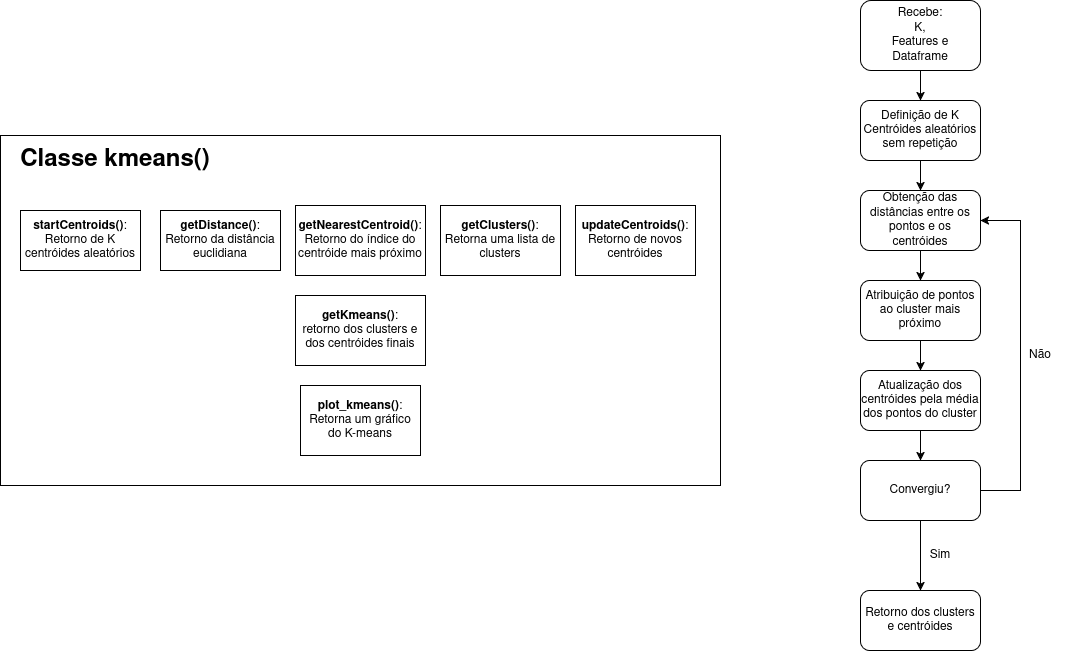

In [98]:
class kmeans():
  def __init__(self, dataframe, features, k):
    # Definição das variáveis usadas na classe

    self.k = k
    self.dataframe = dataframe
    self.features = features
    self.last_centroids = np.array([])
    self.actual_centroids = np.array([])
    self.actual_clusters = np.array([])

    self.matrix = dataframe[self.features]  # obtem as colunas das features no dataframe
    self.matrix = self.matrix.to_numpy()    # converte para array


  def startCentroids(self):
    '''
    Inicializa-se k centroídes em pontos aleatórios do espaço, sem repetição.
    Retorna-se um array de k pontos.
    '''
    rows = np.random.choice(self.matrix.shape[0], self.k, replace=False)
    return self.matrix[rows]


  def getDistance(self, point1, point2):
    # Obtem a distância euclidiana entre dois pontos

    sum = 0
    for i in range(len(point1)):
        dif = point1[i] - point2[i]
        sum += dif ** 2
    return np.sqrt(sum)


  def getNearestCentroid(self, point):
    # Recebe um ponto e retorna o índice do centroíde mais próximo

    distances = [self.getDistance(point,centroid) for centroid in self.actual_centroids]
    min_index = 0
    min_value = distances[0]
    for i in range(1, len(distances)):
        if distances[i] < min_value:
            min_value = distances[i]
            min_index = i
    return min_index


  def getClusters(self):
    # Assimila os pontos da matrix aos centroides mais próximos

    clusters = [[] for _ in range(self.k)]
    for idx, point in enumerate(self.matrix):
        nearest_centroid_idx = self.getNearestCentroid(point)
        clusters[nearest_centroid_idx].append(point)
    return clusters


  def updateCentroids(self, clusters):
    '''
    Atualiza os centróides. O novo centroide é obtido pela média dos pontos
    do cluster atual.
    '''
    new_centroids = []
    for cluster in clusters:
      if len(cluster) == 0:
        new_centroids.append(np.random.rand(len(clusters[0][0])))
      else:
        new_centroids.append(np.mean(cluster, axis=0))
    return new_centroids


  def getKmeans(self):
    '''
    Função principal que une todas as funções utilizadas e retorna os clusters
    e os centróides
    '''
    self.actual_centroids = self.startCentroids()
    self.last_centroids = np.zeros_like(self.actual_centroids)

    while True:

      '''
      Para evitar iterar desnecessariamente, criou-se uma condição de parada da
      iteração.
      '''
      dif = np.array(self.actual_centroids) - np.array(self.last_centroids)
      sumOfDif = np.sum(np.abs(dif))

      if sumOfDif < 1e-300:
        break

      self.last_centroids = self.actual_centroids.copy()
      self.actual_clusters = self.getClusters()
      self.actual_centroids = self.updateCentroids(self.actual_clusters)

    return self.actual_clusters, self.actual_centroids


  def plot_kmeans(self):
    '''
    Para poder visualizar os clusters e os centroídes, criou-se uma função
    de plotagem.
    '''
    data = self.matrix
    centroids = np.array(self.actual_centroids)

    # Criar rótulos com base nos clusters
    labels = np.zeros(len(data))
    for cluster_idx, cluster_points in enumerate(self.actual_clusters):
        for point in cluster_points:
            idx = np.where((data == point).all(axis=1))[0][0]
            labels[idx] = cluster_idx

    # Plotagem dos clusters
    plt.figure(figsize=(8, 5))
    for cluster_idx in range(self.k):
        cluster_points = data[labels == cluster_idx]
        plt.scatter(cluster_points[:, 0],
                    cluster_points[:, 1],
                    label=f'Cluster {cluster_idx}')

    # Plotar centróides
    plt.scatter(centroids[:, 0], centroids[:, 1],
                color='black', marker='X', label='Centroids')

    plt.title(f"{self.features[0]} x {self.features[1]}")
    plt.xlabel(self.features[0])
    plt.ylabel(self.features[1])
    plt.legend()
    plt.grid(True)
    plt.show()

Para que possamos escolher um bom valor de K, optou-se por implementar o Elbow-Method, que consistem em testar n valores de K e escolher o mais adequado. Isso será amplamente explicado em um tópico futuro.

Esse método consiste em escolher o valor de K que se localiza no "cotovelo" da curva, ou seja, o ponto a partir do qual aumentar o K não implica em uma redução expressiva da inércia.

In [99]:
def plot_inertias(kmeans_class, dataframe, features, max_k):
    inertias = []
    ks = []
    for k in range(1, max_k + 1):
        km = kmeans_class(dataframe, features, k)
        km.getKmeans()
        inertia = 0
        for cluster in km.actual_clusters:
            if len(cluster) == 0:
                continue
            centroid = np.mean(cluster, axis=0)
            for point in cluster:
                inertia += km.getDistance(point, centroid)**2
        inertias.append(inertia)
        ks.append(k)

    plt.figure(figsize=(6,4))
    plt.plot(ks, inertias, 'bo-', linewidth=2, markersize=6)
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Inércia')
    plt.title('Método do Cotovelo')
    plt.xticks(ks)
    plt.grid(True)
    plt.show()

Vamos iniciar a análise comparando as variáveis effective_study_hours e exam_score:

In [100]:
features = ['effective_study_hours', 'exam_score']

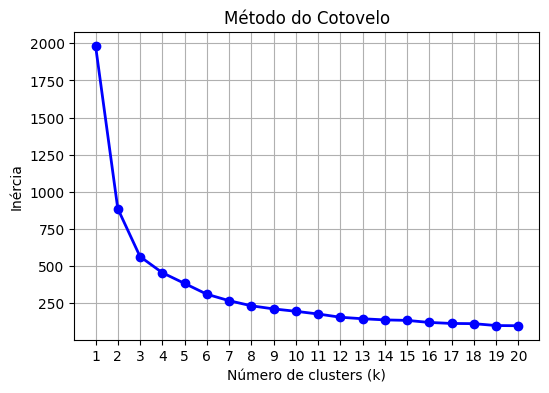

In [101]:
plot_inertias(kmeans, scaled_df_encoded, features, 20)

Nota-se que 3 é o valor ideal de K a se escolher.

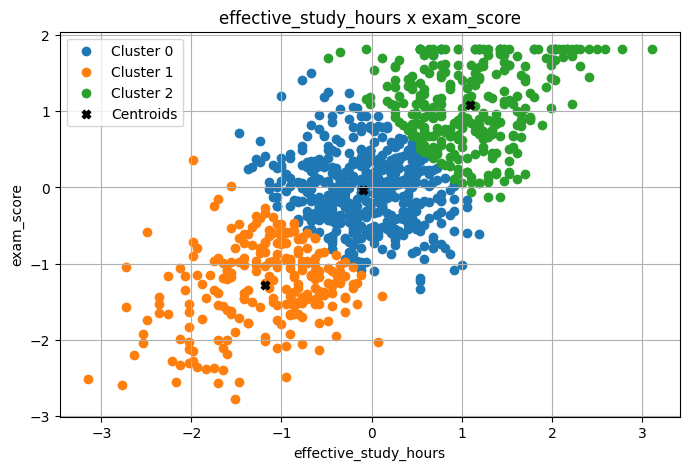

In [102]:
KMEANS = kmeans(scaled_df_encoded, features, 3)
clusters, centroids = KMEANS.getKmeans()
KMEANS.plot_kmeans()

A clusterização realizada permite que classifiquemos os dados em três grupos:


*   Alunos de baixo rendimento;
*   Alunos de médio rendimento;
*   Alunos de alto rendimento.

Exemplos de aplicação:


*   Foco em alunos com baixo rendimento por meio de programas de reforço, tutorias e acompanhamento individualizado;
*   Com os grupos definidos, é possível monitorar a evolução dos alunos ao longo do tempo, avaliando se as intervenções estão fazendo efeito;
*   Adaptação de estratégias pedagógicas onde professores podem planejar atividades e conteúdos diferenciados para cada grupo, promovendo um ensino mais eficaz e direcionado.





Vamos fazer outra análise, dessa vez entre o health_score e o exam_score:

In [103]:
features = ['health_score', 'exam_score']

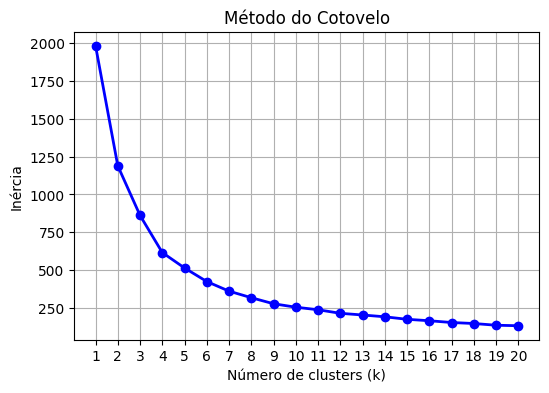

In [104]:
plot_inertias(kmeans, scaled_df_encoded, features, 20)

Nota-se que 4 é o valor ideal de K a se escolher.

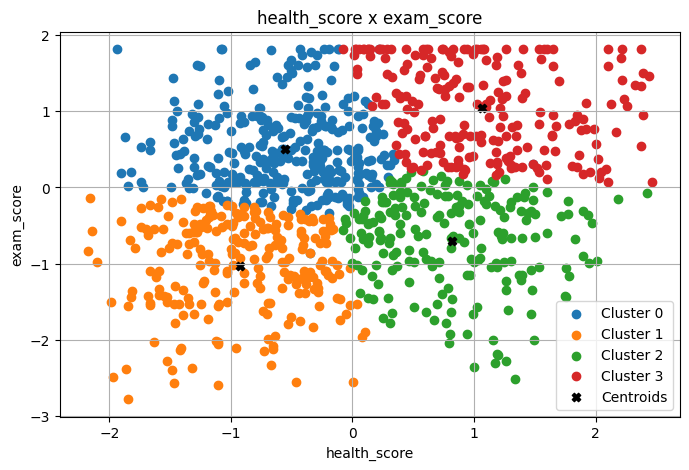

In [105]:
KMEANS = kmeans(scaled_df_encoded, features, 4)
clusters, centroids = KMEANS.getKmeans()
KMEANS.plot_kmeans()

A clusterização realizada permite que classifiquemos os dados em quatro grupos:


*   Alunos saudáveis com boas notas;
*   Alunos saudáveis com notas ruins;
*   Alunos não saudáveis com boas notas;
*   Alunos não saudáveis com notas ruins.

Exemplos de aplicação:


Intervenções Personalizadas e Multidimensionais:

*   Alunos saudáveis com boas notas: Podem ser estimulados a manter seus hábitos e desempenho, servindo como referência para outros grupos;

*   Alunos saudáveis com notas ruins: O foco pode ser em estratégias pedagógicas e motivacionais para melhorar o desempenho acadêmico;

*   Alunos não saudáveis com boas notas: É importante monitorar a saúde desses alunos para evitar que problemas de saúde impactem seu rendimento no futuro, além de oferecer suporte médico e psicológico;

*   Alunos não saudáveis com notas ruins: Grupo prioritário para intervenções que envolvam cuidados de saúde e reforço educacional.






## **Tarefa 05:** Apresente a justificativa de forma discursiva e por meio de cálculos, o valor de K utilizado

A definição do número de clusters no k-means é uma etapa crucial que impacta diretamente a qualidade do agrupamento e a interpretação dos resultados. A escolha adequada de k deve equilibrar a complexidade do modelo e a representatividade dos grupos formados. Além do método quantitativo, a escolha de k deve considerar o contexto do problema e a interpretação dos clusters. Como o objetivo era segmentar grupos de estudantes, o número de clusters deve refletir grupos com características distintas, facilitando a tomada de decisão.Para isso, utilizou-se o Elbow-Method, conforme explicado anteriormente.

A equação abaixo representa a inércia do modelo e foi utilizada para implementação desse método. O objetivo, como comentado, era encontrar o valor de K para o qual a inércia passa a reduzir de forma insignificante.


$$ I = \sum_{j=1}^{k} \sum_{i=1}^{n} \left\| x_{i}^{(j)} - c_{j} \right\|^2 $$


*   $k$: representa o número de clusters;
*   $n$: representa o número de casos ou observações;
*   $x_{i}^{(j)}$: representa o ponto atual da iteração;
*   $c_{j}$: representa o centróide atual da iteração.






## **Tarefa 06:** Revise as hipóteses levantadas no exercício 1 e 2 e com base no algoritmo desenvolvido, apresente análise crítica a respeito das informações extraídas dos dados caso o algoritmo refute ou confirme suas hipóteses

Iniciei a análise com as seguintes suposições:

*   Existe uma correlação entre saúde e nota obtida;
*   Existe uma correlação entre saúde e tempo de estudo;
*   Existe uma correlação entre tempo de estudo e nota obtida;


Além disso, sugeri que fosse possível clusterizar os dados da seguinte maneira:

*   Alunos de alta, média e baixa performance;
*   Alunos que conseguem e não conseguem consciliar saúde e estudo.


Com base na EDA realizada pudemos comprovar as hipóteses iniciais. Após a aplicação do algoritmo de K-means, pudemos classificar grupos de estudantes de maneira satisfatória e de modo que fizesse sentido, também atendendo às suposições iniciais.

Embora não tenham sido encontrados clusters bem definidos, as clusterizações implementadas foram úteis e podem ser de grande valor para a instituição à qual os alunos fazem parte.

## **Tarefa 07:** Exercite sua habilidade de pesquisa e curadoria de informações e a partir de fontes próprias, escreva, com suas palavras, de maneira teórica e com o aprofundamento que achar adequado os algoritmos DBSCAM e Hierarquical Clustering

### **DBSCAN**
O DBSCAN é um algoritmo de clusterização que utiliza a densidade para agrupar os pontos, identificando regiões densas separadas por regiões de baixa densidade.

Diferentemente de métodos que exigem o número de clusters pré-definido, como o K-Means, o DBSCAN determina automaticamente os grupos com base na densidade dos dados.

Por causa disso, ele é muito útil para conjuntos de dados com clusters de formas arbitrárias e tamanhos variados.

**Procedimentos:**
O processo básico do DBSCAN é:

1.   Escolher um ponto não visitado aleatoriamente.
2.   Verificar se ele é um ponto central (faz-se isso analisando se ele possui o número mínimo de pontos necessários para classificar uma região densa dentro de um intervalo).
3.   Se for, formar um cluster e expandi-lo adicionando todos os pontos densamente conectados (vizinhos dos vizinhos centrais).
4.   Se não for, marcar como ruído (que pode ser reclassificado).
5.   Repetir até todos os pontos serem visitados.


    




### **Hierarquical Clustering**


A clusterização hierárquica é uma técnica que utiliza uma hierarquia de clusters, podendo ser representada por uma árvore. Existem duas formas principais:

*    Aglomerativa (bottom-up): começa com cada ponto como um cluster individual e vai unindo os clusters mais próximos progressivamente até formar um único cluster que engloba todos os pontos.

*    Divisiva (top-down): começa com todos os pontos em um único cluster e vai dividindo-os em clusters menores até que cada ponto esteja isolado.

**Procedimentos:**

1.    Medir a distância entre todos os pares de pontos ou clusters.

2.    No método aglomerativo, os dois clusters mais próximos são unidos em um novo cluster.

3.    Após a união, as distâncias entre o novo cluster e os demais são recalculadas, usando critérios como:

    *    Ligação simples (single linkage): distância mínima entre pontos dos dois clusters.

    *    Ligação completa (complete linkage): distância máxima entre pontos dos dois clusters.

    *    Ligação média (average linkage): média das distâncias entre pontos dos dois clusters.

4.    Repetição: O processo continua até que todos os pontos estejam agrupados no número desejado de clusters.


## **Tarefa 08:** Exercite sua habilidade de pesquisa e curadoria de informações e a partir de fontes próprias, escreva, com suas palavras, de maneira teórica e com o aprofundamento que achar adequado qual o algoritmo state-of-the-art para Clustering. Apresente as referências utilizadas.

Após pesquisar, concluiu-se que não existe um único algoritmo que seja o "melhor" para todas as situações. A escolha de qual algoritmo usar depende muito das características dos dados e do objetivo da análise.

No entanto, um método tem se destacado pela sua robustez e flexibilidade: o Kmeans++.

Este método é uma melhoria do K-Means que otimiza a escolha inicial dos centróides, aumentando a chance de convergência para um resultado mais estável.

Por ser um método simples e muito funcional, principalmente para grandes volumes de informações (complexidade O(n)), ele é amplamente utilizado no cenário de ciência de dados.

Referências:

https://developers.google.com/machine-learning/clustering/clustering-algorithms

https://en.wikipedia.org/wiki/K-means%2B%2B

https://www.freecodecamp.org/news/8-clustering-algorithms-in-machine-learning-that-all-data-scientists-should-know/

